In [3]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
import matplotlib.pylab as pl
from itertools import cycle

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [17]:
K = 1.
g = 1.
r_imm = 0.55*g*K
r_det = 0.5*g

N_star = 1.17

t_samples = np.linspace(0., 10., 100)

N_0 = np.array([0.])

In [18]:
# the stochastic pops used for comparison
pops_4c_immig_0_55_bigK = pd.read_csv('solo_results_bigK/ratios4c_rImmig_0_55-stochastic_pop_over_time.csv', delimiter=", ", engine='python')

In [19]:
def logistic_growth(t, f, r_imm, r_det):
    '''
    f0 = N -> dN/dt
    '''
    
    N = f[0]
    
    f_prime = np.zeros_like(f)
    
    f_prime[0] = g*N*(1 - N/K) + r_imm - N*r_det
    
    return f_prime

In [20]:
def pseudo_logistic_growth(t, f, r_imm, r_det):
    '''
    this version is for the stochastic algorithm, which doesn't allow for negative values in the logistic growth term
    '''
    
    N = f[0]
    
    f_prime = np.zeros_like(f)
    
    growth_term = 0 if N >=K else g*N*(1 - N/K)
    
    f_prime[0] = growth_term + r_imm - N*r_det
    
    return f_prime

In [21]:
sol_logistic = solve_ivp(fun=logistic_growth, t_eval=t_samples, y0=N_0, t_span=(t_samples[0], t_samples[-1]), args=(r_imm, r_det))
sol_pseudo_logistic = solve_ivp(fun=pseudo_logistic_growth, t_eval=t_samples, y0=N_0, t_span=(t_samples[0], t_samples[-1]), args=(r_imm, r_det))

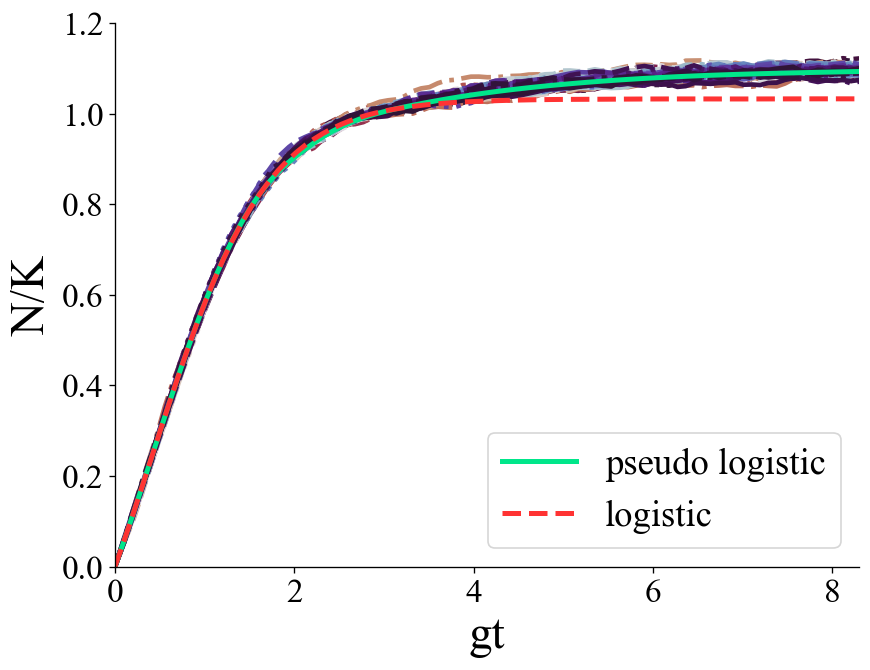

In [22]:
fig, ax = plt.subplots(figsize=(8,6), dpi=120)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

pop_dataset = pops_4c_immig_0_55_bigK
nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
#allows us to alternate line styles for the different runs
lines = ["-","--","-.",":"]
linecycler = cycle(lines[::-1])
for p in range(nCols):

    ax.plot(pop_dataset['t']*0.083, pop_dataset[str(p)]/10000, lw=2.8, color=colors[p], ls=next(linecycler))
    

plt.plot(sol_pseudo_logistic.t, sol_pseudo_logistic.y[0], lw=3, label='pseudo logistic', c='#00e68a')
plt.plot(sol_logistic.t, sol_logistic.y[0], lw=3, label='logistic', ls='--', c='#ff3333')

plt.xlabel('gt', fontsize=28)
plt.ylabel('N/K', fontsize=28)

plt.xlim(0, 8.3)
plt.ylim(0, 1.2)

ax.tick_params(axis='both', which='major', labelsize=20)

plt.legend(fontsize=22)
plt.savefig('paper_plots/pseudo_logistic_comparison.pdf', dpi=330, bbox_inches='tight')
plt.show()

### Get the equivalent pseudo-logistic curves for Figure 4c (deterministic stochastic comparison) for the three immigration rates

In [23]:
sol_pseudo_logistic_rImm_0_55 = solve_ivp(fun=pseudo_logistic_growth, t_eval=t_samples, y0=N_0, t_span=(t_samples[0], t_samples[-1]), args=(0.55*g*K, r_det))
sol_pseudo_logistic_rImm_0_6 = solve_ivp(fun=pseudo_logistic_growth, t_eval=t_samples, y0=N_0, t_span=(t_samples[0], t_samples[-1]), args=(0.6*g*K, r_det))
sol_pseudo_logistic_rImm_0_65 = solve_ivp(fun=pseudo_logistic_growth, t_eval=t_samples, y0=N_0, t_span=(t_samples[0], t_samples[-1]), args=(0.65*g*K, r_det))

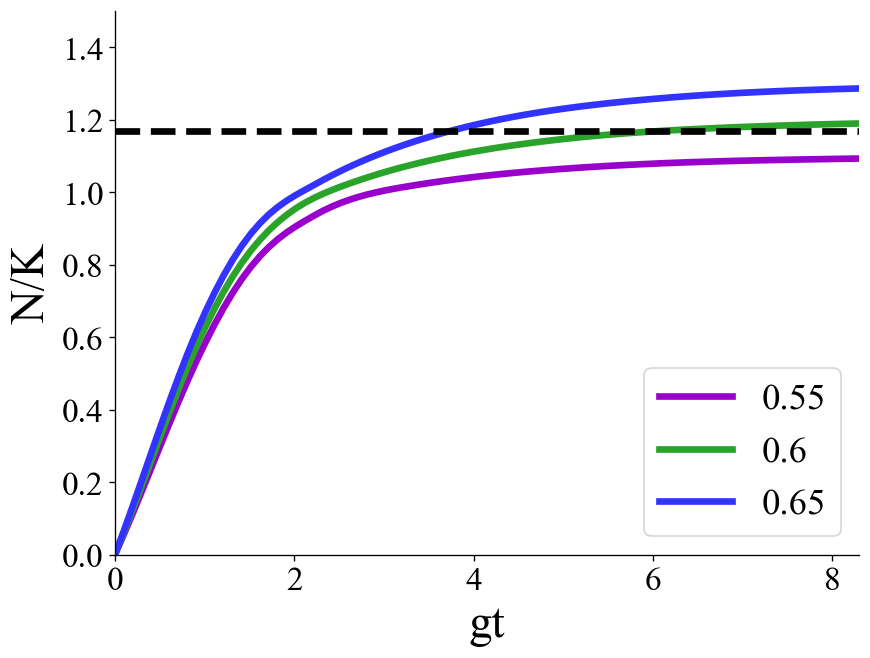

In [32]:
fig, ax = plt.subplots(figsize=(8,6), dpi=120)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# pop_dataset = pops_4c_immig_0_55_bigK
# nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
# colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
# #allows us to alternate line styles for the different runs
# lines = ["-","--","-.",":"]
# linecycler = cycle(lines[::-1])
# for p in range(nCols):

#     ax.plot(pop_dataset['t']*0.083, pop_dataset[str(p)]/10000, lw=2.8, color=colors[p], ls=next(linecycler))
    
#"#9900cc", "#29a329", "#3333ff"
plt.plot(sol_pseudo_logistic_rImm_0_55.t, sol_pseudo_logistic_rImm_0_55.y[0], lw=4, label='0.55', c='#9900cc')
plt.plot(sol_pseudo_logistic_rImm_0_6.t, sol_pseudo_logistic_rImm_0_6.y[0], lw=4, label='0.6', c='#29a329')
plt.plot(sol_pseudo_logistic_rImm_0_65.t, sol_pseudo_logistic_rImm_0_65.y[0], lw=4, label='0.65', c='#3333ff')

plt.axhline(N_star, lw=4, c='k', ls='--')

plt.xlabel('gt', fontsize=28)
plt.ylabel('N/K', fontsize=28)

plt.xlim(0, 8.3)
plt.ylim(0, 1.5)

ax.tick_params(axis='both', which='major', labelsize=20)

plt.legend(fontsize=22)
plt.savefig('paper_plots/pseudo_logistic_Fig4c_recreation.pdf', dpi=330, bbox_inches='tight')
plt.show()